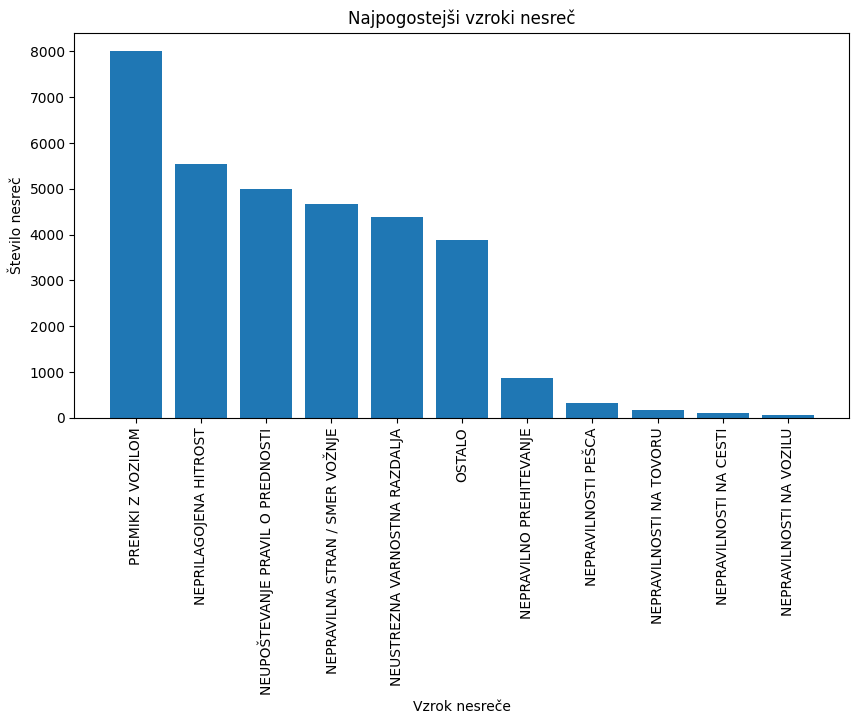

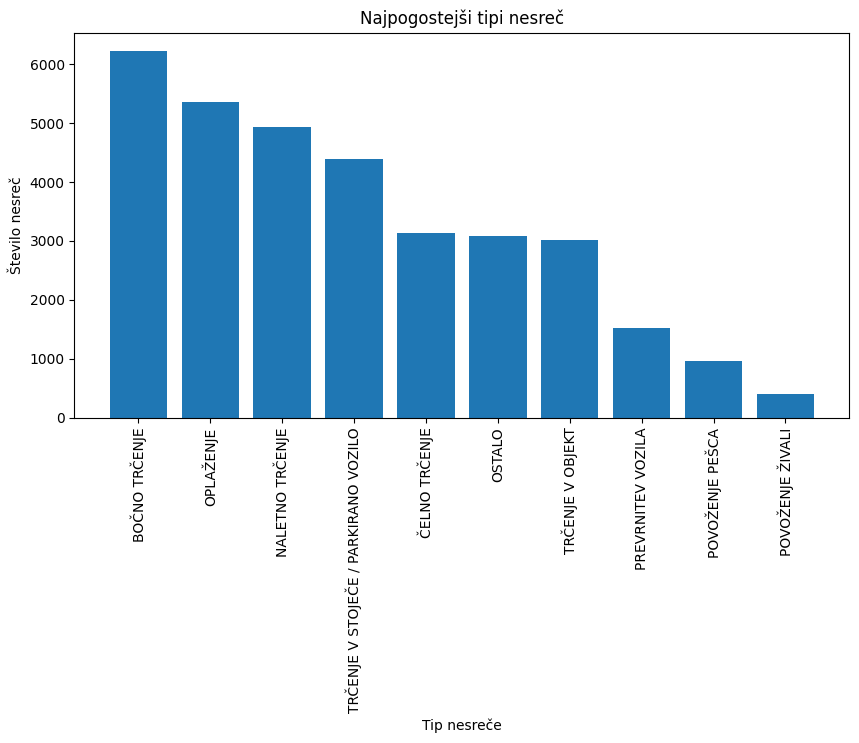

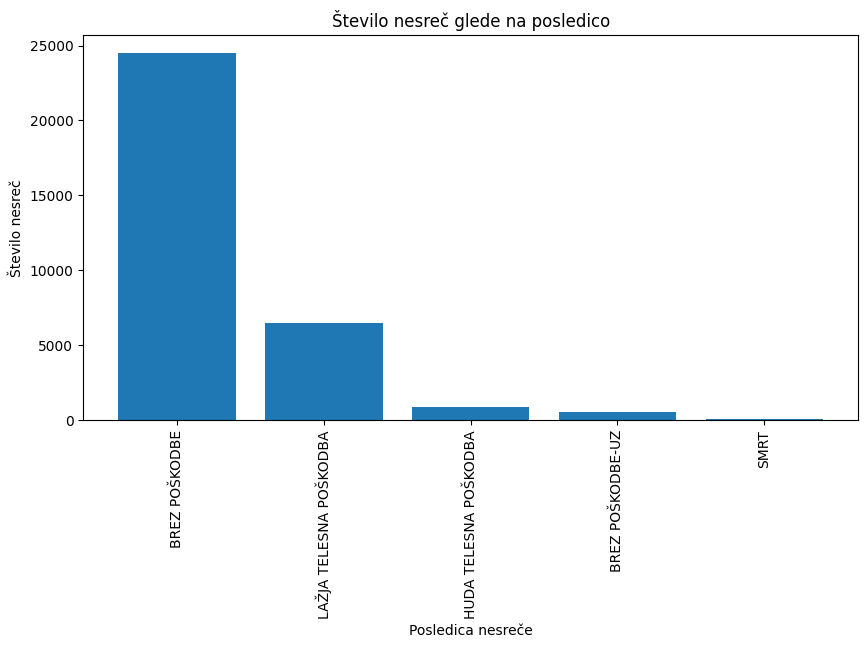

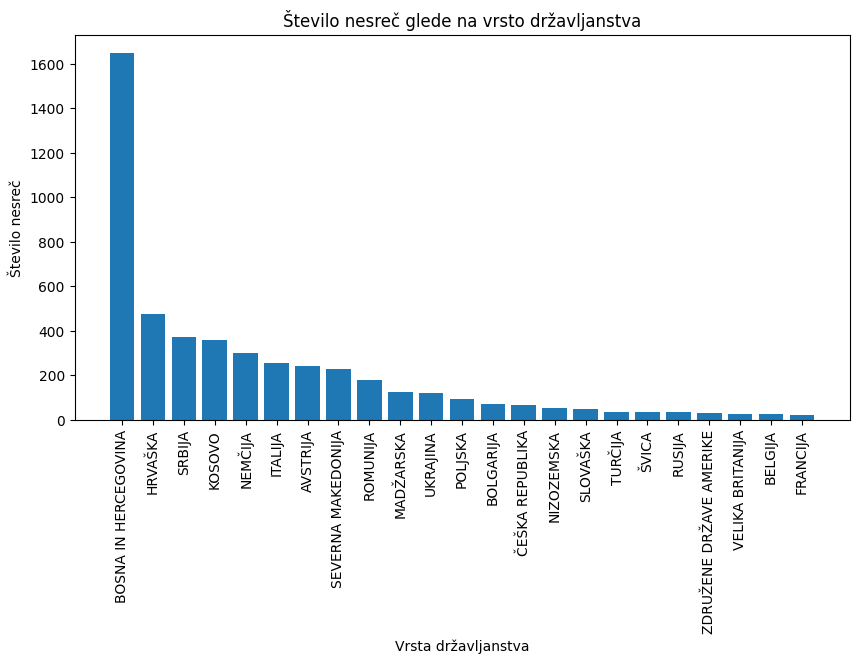

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('./baze/pn2022.csv', sep=';', decimal=',', encoding='utf-8')



vzroki = df['VzrokNesrece']


st_nesrec_po_vzrokih = vzroki.value_counts()


plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_vzrokih.index, st_nesrec_po_vzrokih.values)
plt.xticks(rotation=90)
plt.xlabel('Vzrok nesreče')
plt.ylabel('Število nesreč')
plt.title('Najpogostejši vzroki nesreč')
plt.show()


tipi = df['TipNesrece']

st_nesrec_po_tipih = tipi.value_counts()

plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_tipih.index, st_nesrec_po_tipih.values)
plt.xticks(rotation=90)
plt.xlabel('Tip nesreče')
plt.ylabel('Število nesreč')
plt.title('Najpogostejši tipi nesreč')
plt.show()

posledice = df['PoskodbaUdelezenca']


st_nesrec_po_posledicah = posledice.value_counts()


plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_posledicah.index, st_nesrec_po_posledicah.values)
plt.title("Število nesreč glede na posledico")
plt.xticks(rotation=90)
plt.xlabel("Posledica nesreče")
plt.ylabel("Število nesreč")
plt.show()


drzavljanstvo = df['Drzavljanstvo']
st_nesrec_po_drzavljanstvu = drzavljanstvo.value_counts().drop('SLOVENIJA').loc[lambda x: x > 20]
plt.figure(figsize=(10,5))
plt.bar(st_nesrec_po_drzavljanstvu.index, st_nesrec_po_drzavljanstvu.values)
plt.title("Število nesreč glede na vrsto državljanstva")
plt.xticks(rotation=90)
plt.xlabel("Vrsta državljanstva")
plt.ylabel("Število nesreč")
plt.show()

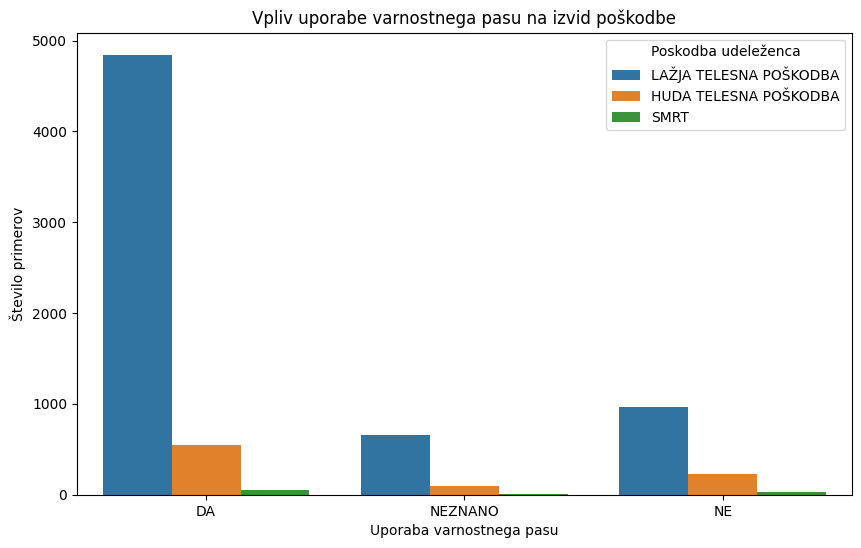

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

faktor_oseb = pd.read_csv('./baze/manjse/FaktorOseb.csv')


subset = faktor_oseb[['ZaporednaStevilkaOsebeVPN', 'UporabaVarnostnegaPasu', 'VrednostAlkotesta', 'VrednostStrokovnegaPregleda']]


osebe = pd.read_csv('./baze/manjse/Osebe.csv')
podatki = pd.merge(subset, osebe[['ZaporednaStevilkaOsebeVPN', 'PoskodbaUdelezenca']], on='ZaporednaStevilkaOsebeVPN', how='left')


podatki = podatki.dropna(subset=['PoskodbaUdelezenca'])


podatki = podatki[~podatki['PoskodbaUdelezenca'].isin(['BREZ POŠKODBE', 'BREZ POŠKODBE-UZ'])]


podatki['VrednostAlkotesta'] = podatki['VrednostAlkotesta'].str.replace(',', '.').astype(float)
podatki['VrednostStrokovnegaPregleda'] = podatki['VrednostStrokovnegaPregleda'].str.replace(',', '.').astype(float)



podatki['VrednostAlkotesta'] = (podatki['VrednostAlkotesta'] - podatki['VrednostAlkotesta'].min()) / (podatki['VrednostAlkotesta'].max() - podatki['VrednostAlkotesta'].min())
podatki['VrednostStrokovnegaPregleda'] = (podatki['VrednostStrokovnegaPregleda'] - podatki['VrednostStrokovnegaPregleda'].min()) / (podatki['VrednostStrokovnegaPregleda'].max() - podatki['VrednostStrokovnegaPregleda'].min())


plt.figure(figsize=(10, 6))
sns.countplot(x='UporabaVarnostnegaPasu', hue='PoskodbaUdelezenca', data=podatki)
plt.title('Vpliv uporabe varnostnega pasu na izvid poškodbe')
plt.xlabel('Uporaba varnostnega pasu')
plt.ylabel('Število primerov')
plt.legend(title='Poskodba udeleženca', loc='upper right')
plt.show()



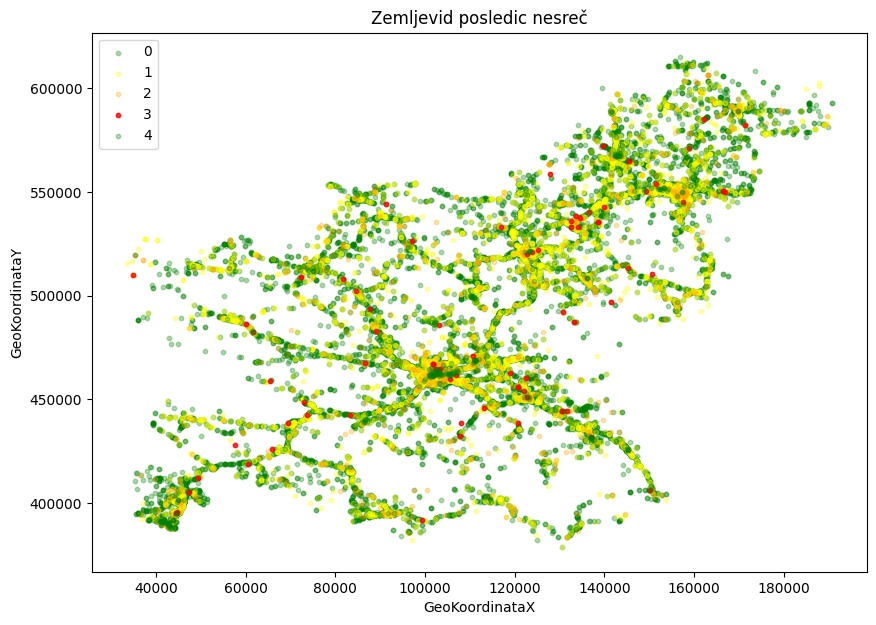

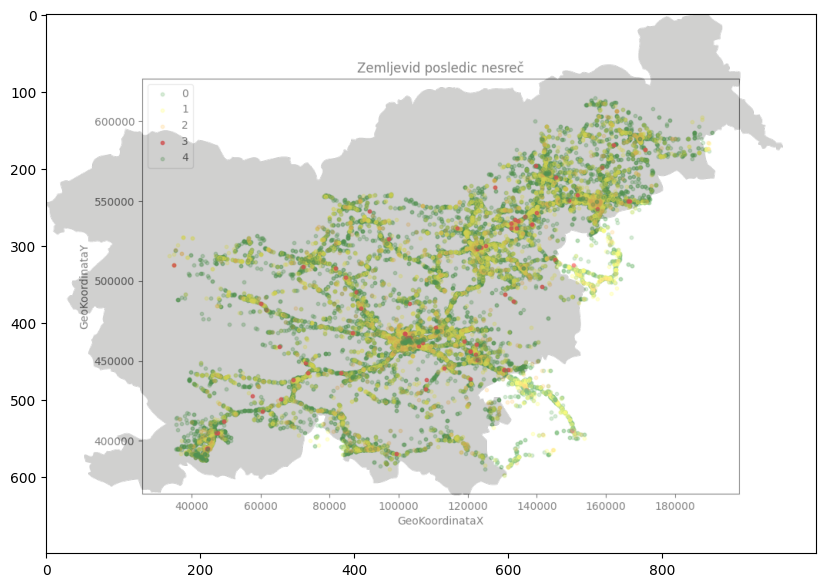

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

koordinate = pd.read_csv('./baze/manjse/Koordinate.csv')
osebe = pd.read_csv('./baze/manjse/Osebe.csv')
img = plt.imread('Slovenija.png')
nesreca = pd.merge(koordinate, osebe[['ZaporednaStevilkaOsebeVPN', 'PoskodbaUdelezenca']], on='ZaporednaStevilkaOsebeVPN', how='left')
nesreca = nesreca.drop(nesreca[(nesreca['GeoKoordinataX'] == 0) & (nesreca['GeoKoordinataY'] == 0)].index)
nesreca = nesreca.dropna(subset=['PoskodbaUdelezenca'])
nesreca['PoskodbaUdelezenca'] = nesreca['PoskodbaUdelezenca'].map({
    'BREZ POŠKODBE': 0,
    'LAŽJA TELESNA POŠKODBA': 1,
    'HUDA TELESNA POŠKODBA': 2,
    'SMRT': 3,
    'BREZ POŠKODBE-UZ': 4
})
colors = ['green', 'yellow', 'orange', 'red', 'green']
fig, ax = plt.subplots(figsize=(10, 7))

for i, posledica in enumerate(sorted(nesreca['PoskodbaUdelezenca'].unique())):
    subset = nesreca[nesreca['PoskodbaUdelezenca'] == posledica]
    alpha = 0.8 if posledica == 3 else 0.3
    ax.scatter(subset['GeoKoordinataX'], subset['GeoKoordinataY'], s=10, alpha=alpha, c=colors[i], label=posledica)

ax.set_title('Zemljevid posledic nesreč')
ax.set_xlabel('GeoKoordinataX')
ax.set_ylabel('GeoKoordinataY')
ax.legend()

plt.savefig('my_plot.png')  


img_overlay = plt.imread('my_plot.png')
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(img)
ax.imshow(img_overlay, alpha=0.5)
plt.show()

In [3]:
nesreca = pd.read_csv('./baze/pn2022.csv', sep=';', decimal=',', encoding='utf-8')
nesreca = nesreca.drop(nesreca[(nesreca['GeoKoordinataX'] == 0) & (nesreca['GeoKoordinataY'] == 0)].index)
unikatne_poskodbe = nesreca['PoskodbaUdelezenca'].unique()
print(unikatne_poskodbe)

['BREZ POŠKODBE' 'LAŽJA TELESNA POŠKODBA' 'BREZ POŠKODBE-UZ'
 'HUDA TELESNA POŠKODBA' nan 'SMRT']


In [4]:
#####################################################################################################

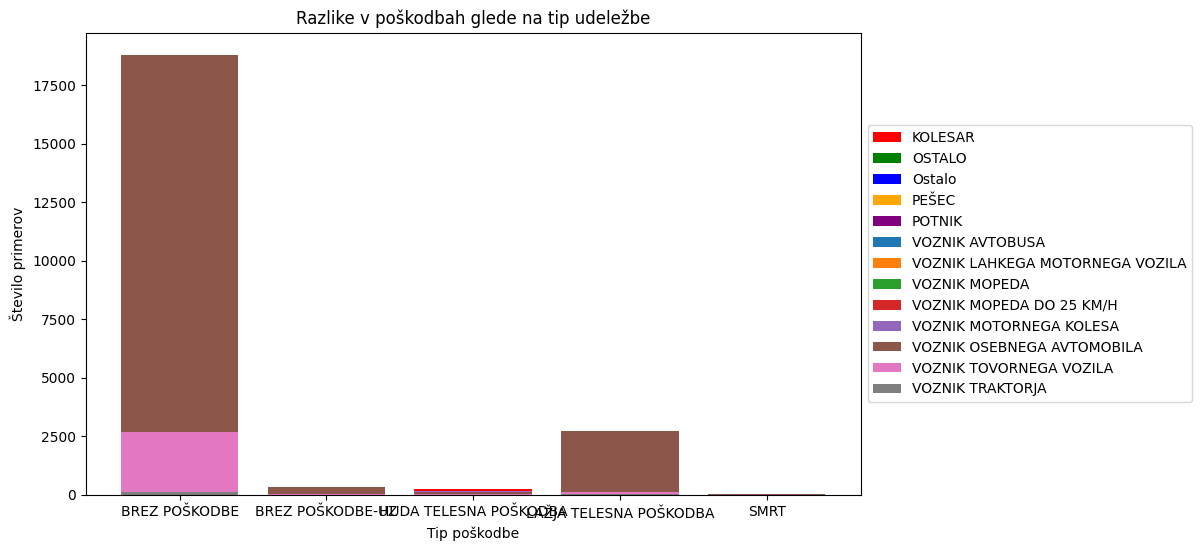

In [5]:
import numpy as np
tipi_udelezbe = osebe['VrstaUdelezenca'].value_counts()
min_count = 100
pogoste_vrste = tipi_udelezbe[tipi_udelezbe >= min_count].index
osebe['VrstaUdelezenca'] = np.where(osebe['VrstaUdelezenca'].isin(pogoste_vrste), osebe['VrstaUdelezenca'], 'Ostalo')


poškodbe_udeleženci = osebe.groupby(['VrstaUdelezenca', 'PoskodbaUdelezenca']).size().unstack(fill_value=0)

barve = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(10, 6))
for i, (tip, poškodbe) in enumerate(poškodbe_udeleženci.iterrows()):
    if i < len(barve):
        plt.bar(poškodbe.index, poškodbe.values, label=tip, color=barve[i])
    else:
        plt.bar(poškodbe.index, poškodbe.values, label=tip)

plt.title('Razlike v poškodbah glede na tip udeležbe')
plt.xlabel('Tip poškodbe')
plt.ylabel('Število primerov')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


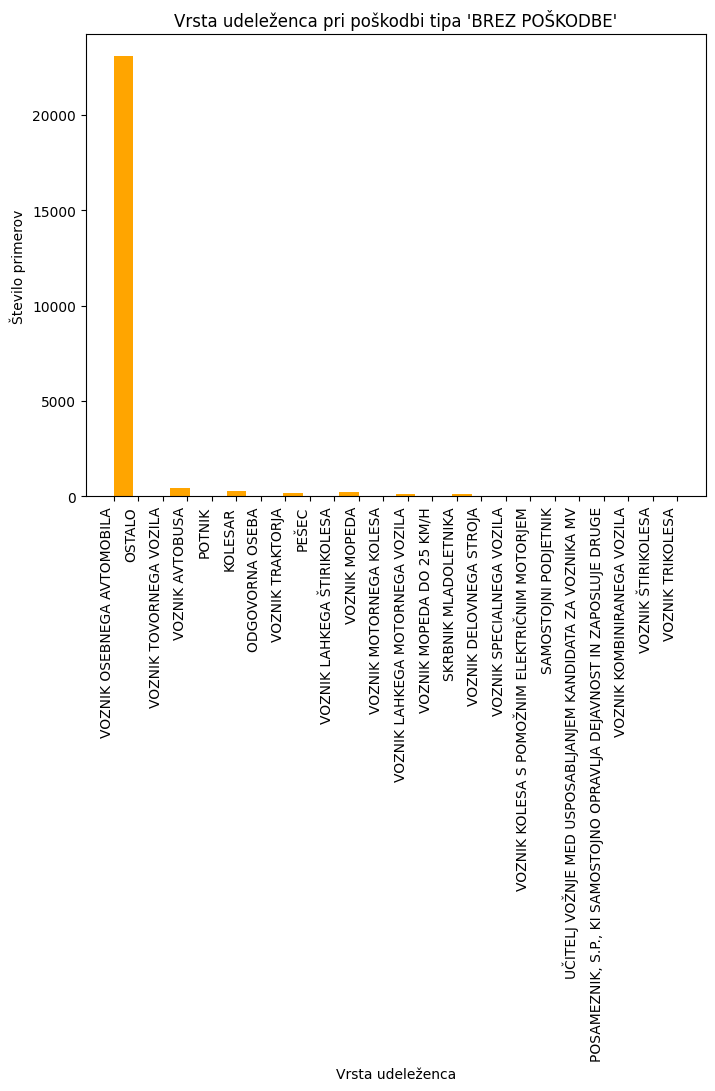

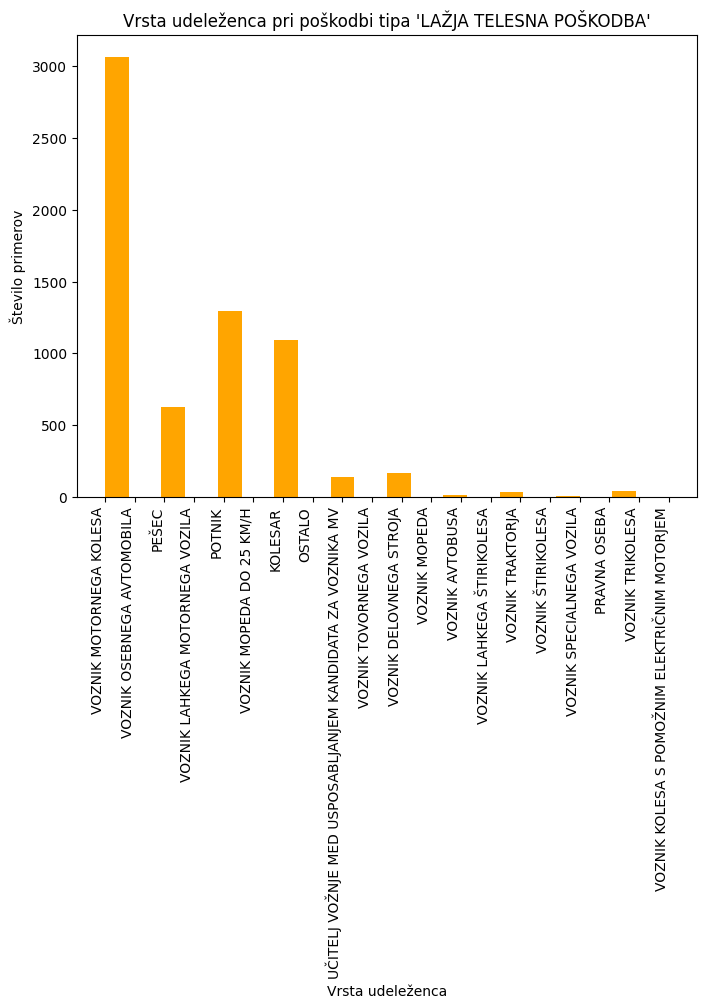

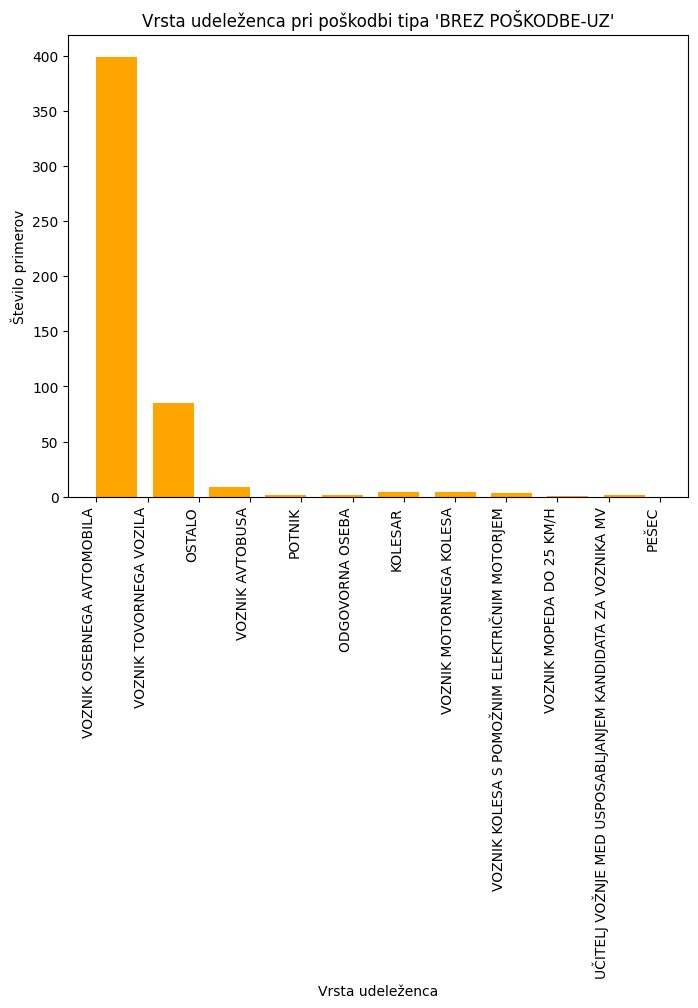

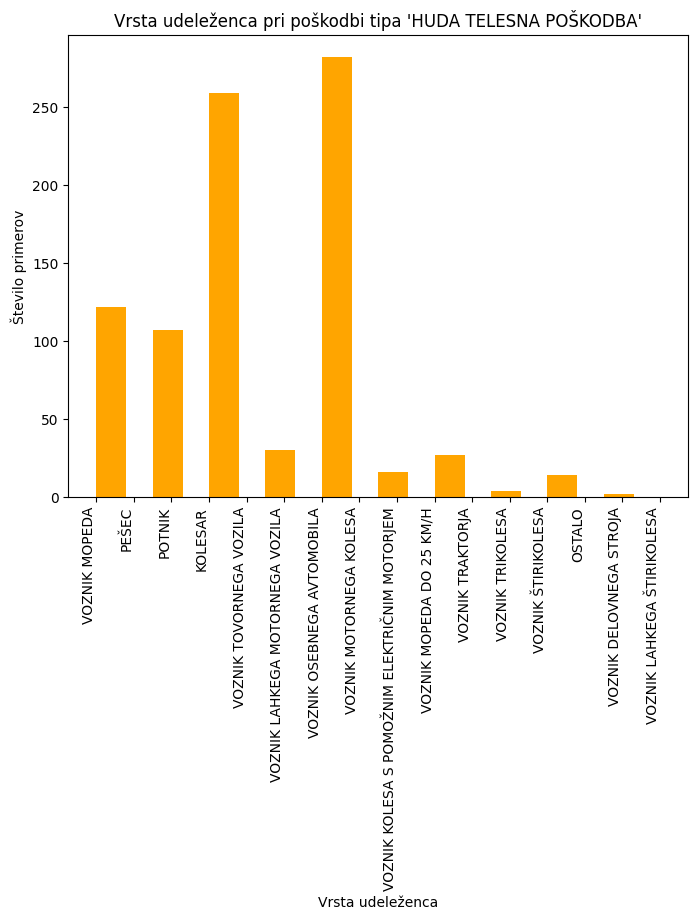

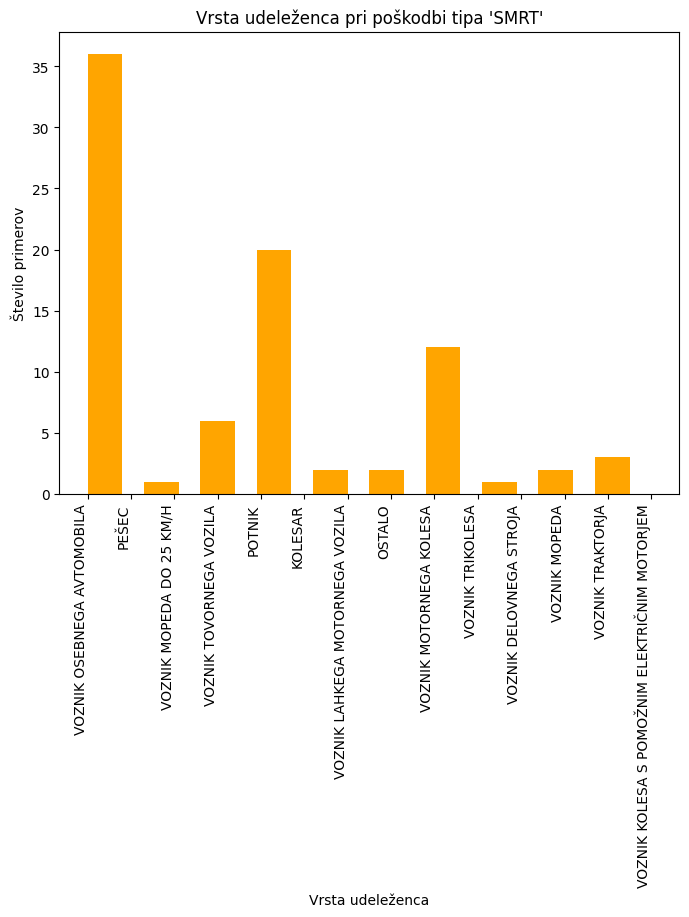

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

osebe = pd.read_csv('./baze/manjse/Osebe.csv')


osebe.loc[osebe['VrstaUdelezenca'].isin(['POTNIK VOZILA', 'OSTALO']), 'VrstaUdelezenca'] = 'OSTALO'


osebe = osebe.dropna(subset=['PoskodbaUdelezenca'])

if 'nan' in osebe['PoskodbaUdelezenca'].unique():
    osebe = osebe[osebe['PoskodbaUdelezenca'] != 'nan']


poškodbe = osebe['PoskodbaUdelezenca'].unique()
for p in poškodbe:
    subset = osebe[osebe['PoskodbaUdelezenca'] == p]
    plt.figure(figsize=(8, 6))
    plt.hist(subset['VrstaUdelezenca'], color='orange', width=0.8)

    plt.title(f"Vrsta udeleženca pri poškodbi tipa '{p}'")
    plt.xlabel('Vrsta udeleženca')
    plt.ylabel('Število primerov')
    plt.xticks(rotation=90, ha='right')

    plt.show()


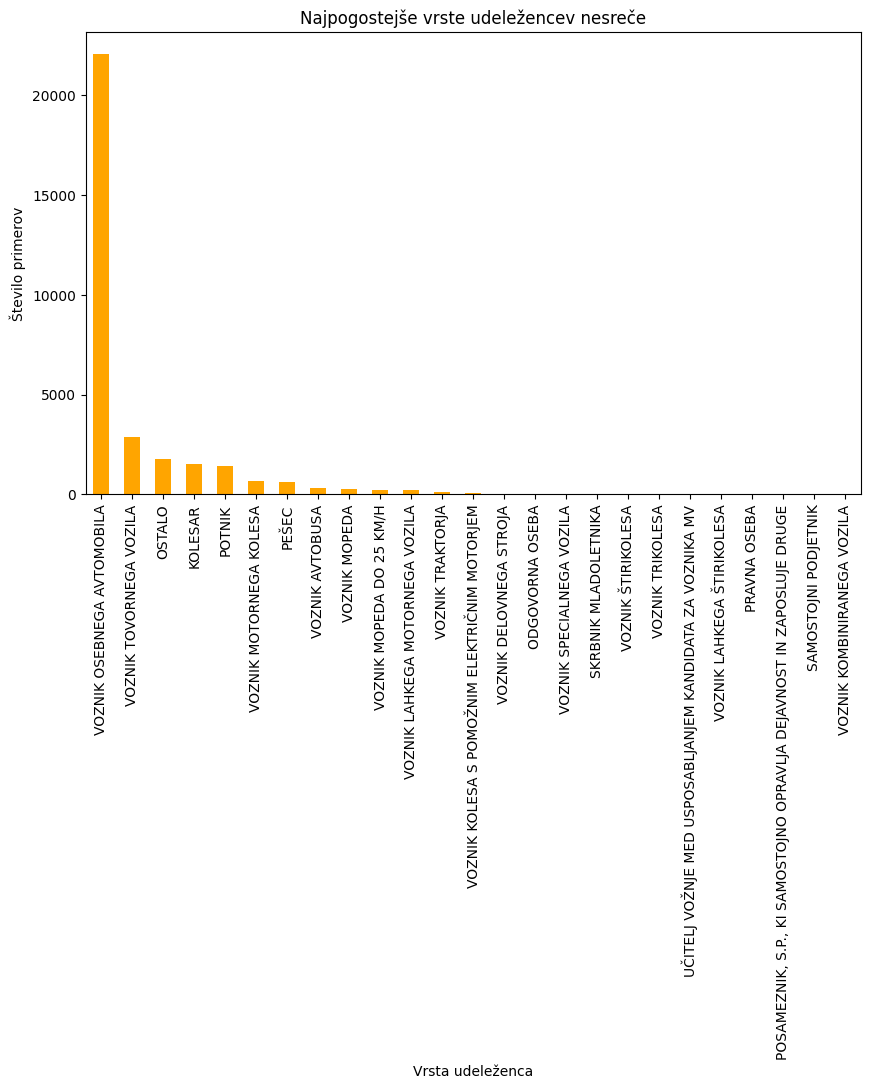

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
osebe = pd.read_csv('./baze/manjse/Osebe.csv')

najpogostejse_vrste = osebe['VrstaUdelezenca'].value_counts()

plt.figure(figsize=(10, 6))
najpogostejse_vrste.plot(kind='bar', color='orange')

plt.title('Najpogostejše vrste udeležencev nesreče')
plt.xlabel('Vrsta udeleženca')
plt.ylabel('Število primerov')

plt.show()